# ロジスティックカーブ

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import os

os.makedirs('out', exist_ok=True)

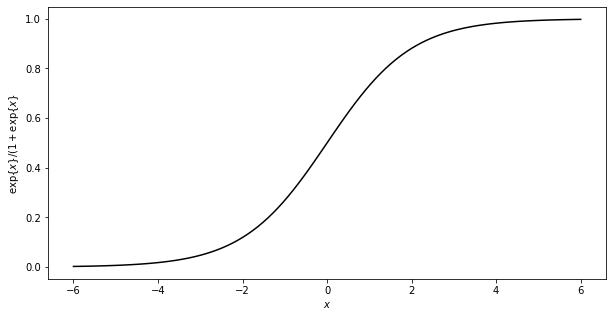

In [2]:
# ロジスティックカーブ
plt.figure(figsize=(10, 5))
x = np.linspace(-6, 6, 100)
y = np.exp(x)/(1+np.exp(x))
plt.xlabel(r'$x$')
plt.ylabel(r'$\exp\{x\}/(1+\exp\{x\}$')
plt.plot(x, y, c='black')
# ファイル出力する場合
#plt.savefig('out/ロジスティックカーブ.eps', dpi=600)

### Google Colabを利用する場合は、次のセルの全行の#を1つ削除して実行する

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

## データフレームへの読み込み
## Google DriveのColab Notebooksにダウンロードしたフォルダ(marketing)をセットすることを想定
#iPath = '/content/drive/MyDrive/Colab Notebooks/marketing/Chapter_4/in/'
#iFile=iPath+'sec4-2data.csv'

## モジュールの読み込み
#import seaborn as sns

## データの読み込み
#df_logi = pd.read_csv(iFile)

## 先頭5行の出力
#df_logi.head()

In [4]:
# モジュールの読み込み
import seaborn as sns

# データの読み込み
df_logi = pd.read_csv('in/sec4-2data.csv')

# 先頭5行の出力
df_logi.head()

,モニタ,健康食品購入有無,菓子,清涼飲料,パン・シリアル類,農産,水物,麺類,デザート・ヨーグルト,乳飲料,調味料,冷凍食品,惣菜類,アルコール飲料,調理品,果実飲料
0,13,1,0.191606,0.082117,0.031022,0.000000,0.065693,0.093066,0.023723,0.025547,0.040146,0.080292,0.009124,0.047445,0.056569,0.016423
1,14,1,0.202192,0.141291,0.168697,0.069428,0.031669,0.010962,0.097442,0.037759,0.024970,0.004872,0.011571,0.000609,0.015225,0.078563
2,15,0,0.205387,0.148148,0.181818,0.030303,0.013468,0.010101,0.050505,0.006734,0.016835,0.178451,0.016835,0.000000,0.016835,0.040404
3,16,1,0.162081,0.069035,0.059530,0.137069,0.075038,0.045023,0.032016,0.042021,0.037519,0.044022,0.022511,0.065533,0.007504,0.007504
4,18,0,0.000000,0.250000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


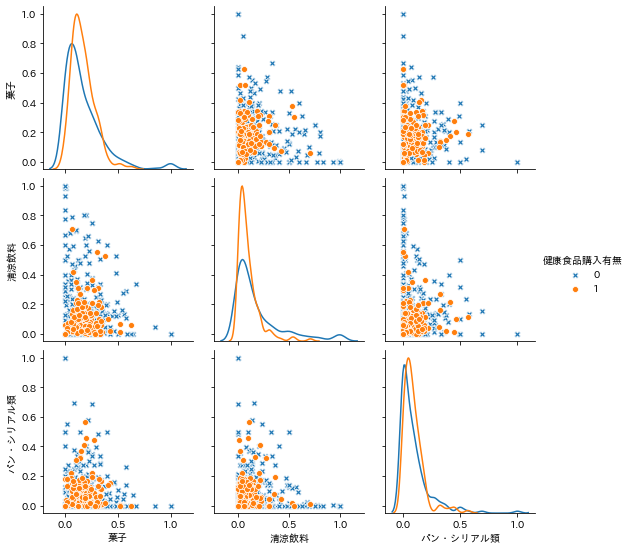

In [5]:
# 散布図行列の一部の出力
# 日本語環境
import japanize_matplotlib

# 日本語環境
#mpl.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto SansCJK JP']

# seabornによる散布図行列の作成
sns.pairplot(df_logi.iloc[:, 1:5],  # データ
             hue='健康食品購入有無',  # 健康食品購入有無によって色分け
             markers=['X', 'o'],  # マーカーの指定
             diag_kind='kde',  # 対角要素の分布にカーネル密度推定を指定
             diag_kws=dict(shade=False)  # 対角要素に色を塗らない
             # palette='Greys' #カラーにグレースケールを利用
             )
plt.savefig('out/nm_scatter_matrix.eps', dpi=600)

In [6]:
# ロジスティック回帰分析
# 目的変数
y = df_logi['健康食品購入有無']

# 説明変数
X = df_logi.iloc[:, 2:]

# ロジスティック回帰分析のモデルの設定
logistic_model = sm.Logit(y, sm.add_constant(X))

# パラメータの求解
logistic_res = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.579182
         Iterations 6


In [7]:
# パラメータの出力
# logistic_res.params
# 分析結果の概要の出力
logistic_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               健康食品購入有無   No. Observations:                  480
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                           14
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                 0.05987
Time:                        19:15:50   Log-Likelihood:                -278.01
converged:                       True   LL-Null:                       -295.71
Covariance Type:            nonrobust   LLR p-value:                  0.001278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5801      0.605     -0.958      0.338      -1.766       0.606
菓子            -0.2234      0.884     -0.253      0.800      -1.956       1.509
清涼飲料          -2.5495      0.908     -2.808      0.005      -4.329      -0.770
パン・シリアル類      -0.7018      1.017     -0.690      0.490      -2.696       1.292
農産            -0.1597      1.899     -0.084      0.933      -3.882       3.563
水物            -1.6202      2.111     -0.767      0.443      -5.758       2.518
麺類            -0.3918      1.729     -0.227      0.821      -3.780       2.997
デザート・ヨーグルト     0.1648      1.562      0.106      0.916      -2.896       3.226
乳飲料            3.1823      2.236      1.423      0.155      -1.201       7.566
調味料            2.4932      2.918      0.854      0.393      -3.226       8.212
冷凍食品           3.6148      2.475      1.460      0.144      -1.236       8.466
惣菜類            0.1949      2.808      0.069      0.945      -5.308       5.698
アルコール飲料       -1.0394      1.145     -0.908      0.364      -3.284       1.205
調理品            2.8590      2.655      1.077      0.282      -2.345       8.063
果実飲料          -0.7242      2.053     -0.353      0.724      -4.749       3.300
==============================================================================
"""

In [8]:
# 変数を限定したモデル
# 限定した説明変数
X2 = df_logi.loc[:, ['清涼飲料', '乳飲料', '冷凍食品']]

# モデルの作成とパラメータの求解
logistic_model2 = sm.Logit(y, sm.add_constant(X2))
logistic_res2 = logistic_model2.fit()

# 結果の出力
logistic_res2.summary()

# パラメータの出力
# logistic_res2.params

Optimization terminated successfully.
         Current function value: 0.584751
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               健康食品購入有無   No. Observations:                  480
Model:                          Logit   Df Residuals:                      476
Method:                           MLE   Df Model:                            3
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                 0.05083
Time:                        19:15:50   Log-Likelihood:                -280.68
converged:                       True   LL-Null:                       -295.71
Covariance Type:            nonrobust   LLR p-value:                 1.338e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7123      0.171     -4.169      0.000      -1.047      -0.377
清涼飲料          -2.5494      0.708     -3.598      0.000      -3.938      -1.161
乳飲料            3.3946      2.085      1.628      0.104      -0.692       7.481
冷凍食品           4.6138      2.310      1.997      0.046       0.087       9.141
==============================================================================
"""

In [9]:
# 混同行列と精度計算のためのモジュールの読み込み
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 予測確率の計算
pred_class = pd.DataFrame(logistic_res2.predict())

# クラスに変換（購入経験有りの構成比率以上であれば1，そうでなければ0）
pred_class = pred_class.iloc[:, 0].map(
    lambda x: 1 if x >= y.sum() / y.count() else 0)

# 混同行列の作成
conf_mat = pd.DataFrame(confusion_matrix(y, pred_class))
conf_mat.index = ['観測クラス=0', '観測クラス=1']
conf_mat.columns = ['予測クラス=0', '予測クラス=1']

# 混同行列の出力
conf_mat

,予測クラス=0,予測クラス=1
観測クラス=0,158,175
観測クラス=1,39,108


In [10]:
# 各種精度の計算
print('accuracy: ', accuracy_score(y, pred_class))
print('precision: ', precision_score(y, pred_class))
print('recall: ', recall_score(y, pred_class))
print('f1: ', f1_score(y, pred_class))

accuracy:  0.5541666666666667
precision:  0.38162544169611307
recall:  0.7346938775510204
f1:  0.5023255813953489


例題4.10

In [11]:
# 混同行列と精度計算のためのモジュールの読み込み
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 予測確率の計算
pred_class = pd.DataFrame(logistic_res2.predict())

# クラスに変換（0.3以上であれば1，そうでなければ0）
pred_class = pred_class.iloc[:, 0].map(lambda x: 1 if x >= .3 else 0)

# 混同行列の作成
conf_mat = pd.DataFrame(confusion_matrix(y, pred_class))
conf_mat.index = ['観測クラス=0', '観測クラス=1']
conf_mat.columns = ['予測クラス=0', '予測クラス=1']

# 混同行列の出力
conf_mat

,予測クラス=0,予測クラス=1
観測クラス=0,153,180
観測クラス=1,34,113
